In [19]:
import sys
sys.path.append("/Users/PredatoryMink/Statistics")

import numpy as np
import pandas as pd
import math as mt
import scipy.stats as st
import scipy.optimize as opt
import scipy.special as sp
import scipy.optimize as opt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from collections import namedtuple
from tqdm import tqdm
from mystats.utils import plot as myplot
from mystats.criterion import fit as myfit
from hyppo.independence import Dcorr

In [6]:
def Pablo(a, b, N=10_000, K=1_000):
    excess = np.zeros(K)
    defect = np.zeros(K)
    steps = st.expon(scale=1/a).rvs((K, N))
    process = steps.cumsum(axis=1)
    T = st.expon(scale=1/b).rvs(K)
    for i in range(K):
        ind = np.searchsorted(process[i], T[i], side='right')
        excess[i] = process[i][ind] - T[i]
        defect[i] = T[i] - (process[i][ind - 1] if ind else 0)
    return (excess, defect)

In [33]:
pval = []

In [34]:
for i in range(100):
    e, d = Pablo(3, 9)
    pval.append(Dcorr().test(e, d).pvalue)

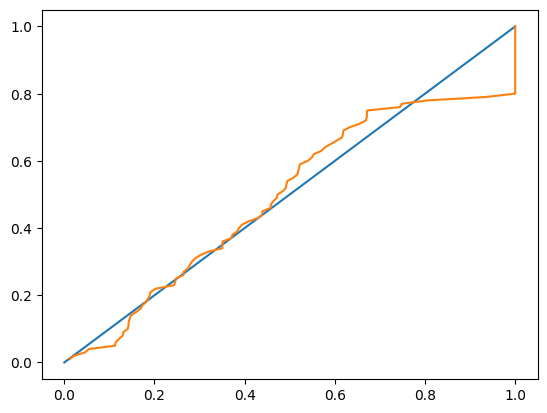

In [35]:
plt.plot([0, 1], [0, 1])
myplot.ecdf(pval)

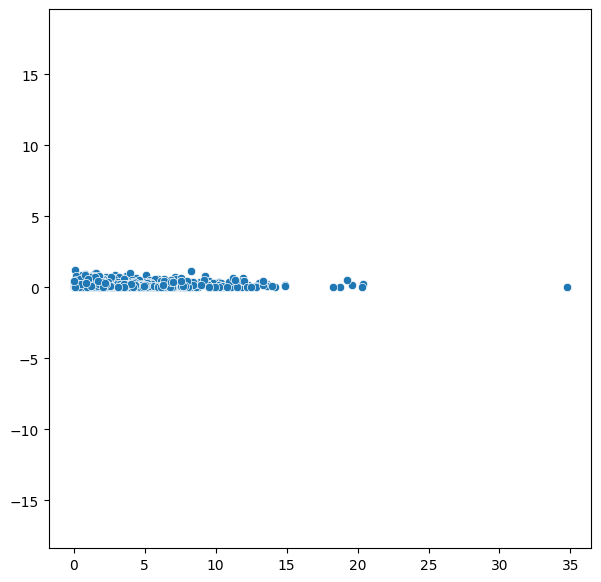

In [47]:
plt.figure(figsize=(7,7))
plt.axis('equal')
a, b = 0.3, 5
e, d = Pablo(a, b)
sns.scatterplot(x=e, y=d);

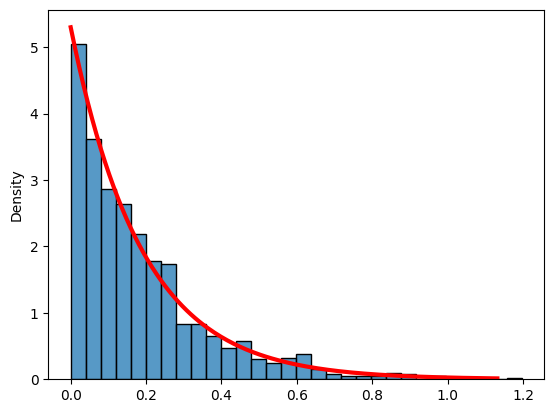

In [44]:
sns.histplot(d, stat='density')
x = np.linspace(0, 6/(a+b), 200)
y = st.expon(scale=1/(a+b)).pdf(x)
plt.plot(x, y, lw=3, c='r');

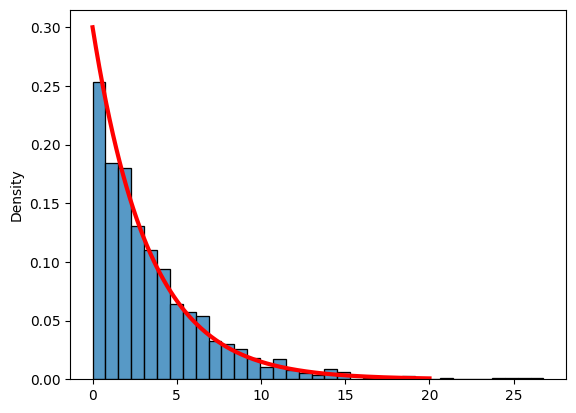

In [45]:
sns.histplot(e, stat='density')
x = np.linspace(0, 6/(a), 200)
y = st.expon(scale=1/(a)).pdf(x)
plt.plot(x, y, lw=3, c='r');